<a href="https://colab.research.google.com/github/dudududukim/Deeplearning_learning/blob/MNIST/MNIST_dataset(with_NN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow==1.4.0

In [2]:
#epoch와 batch를 이용
 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import torch
 
tf.set_random_seed(777)  # for reproducibility
 
'''
from tensorflow.examples.tutorials.mnist import input_data
 
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
 
nb_classes = 10
'''
#file input from google drive
xy=np.loadtxt('/content/drive/MyDrive/tensorflow/mnist/train.csv',delimiter=',',dtype=np.float32)
x_data = xy[:,1:]
y_data = xy[:,0]
 
test_x=np.loadtxt('/content/drive/MyDrive/tensorflow/mnist/test.csv',delimiter=',',dtype=np.float32)
 
 
print(y_data)
print(len(y_data))
print(y_data.reshape(len(y_data),1))
 
'''
filename_queue = tf.train.string_input_producer(
    ['/content/drive/MyDrive/tensorflow/mnist/train.csv'], shuffle=False, name='filename_queue')
 
reader=tf.TextLineReader()
key, value = reader.read(filename_queue)
 
record_defaults=[[0.]]*785
xy=tf.decode_csv(value, record_defaults=record_defaults)
 
train_x, train_y =(tf.train.batch([xy[1:], xy[:1]],batch_size=1000))
test_x, test_y =(tf.train.batch([xy[1:], xy[:1]],batch_size=100))
'''
 
print('Data loaded!!')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or 

[1. 0. 1. ... 7. 6. 9.]
42000
[[1.]
 [0.]
 [1.]
 ...
 [7.]
 [6.]
 [9.]]
Data loaded!!


Epoch: 0001, Cost: 9.065219405
Epoch: 0002, Cost: 7.258877622
Epoch: 0003, Cost: 6.692660491
Epoch: 0004, Cost: 6.214387504
Epoch: 0005, Cost: 5.801606174
Epoch: 0006, Cost: 5.428503679
Epoch: 0007, Cost: 5.105207490
Epoch: 0008, Cost: 4.827238389
Epoch: 0009, Cost: 4.583178716
Epoch: 0010, Cost: 4.359135432
Epoch: 0011, Cost: 4.161996335
Epoch: 0012, Cost: 3.984387875
Epoch: 0013, Cost: 3.817138849
Epoch: 0014, Cost: 3.661807912
Epoch: 0015, Cost: 3.536284645
Learning finished
Accuracy:  0.3885
18749 Prediction:  [6]


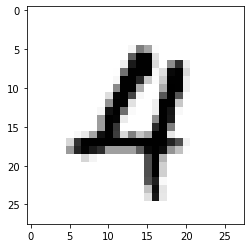

915 Prediction:  [8]


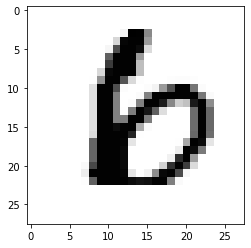

20025 Prediction:  [9]


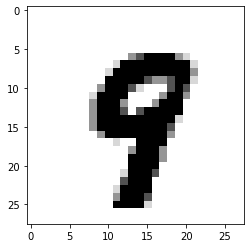

3518 Prediction:  [7]


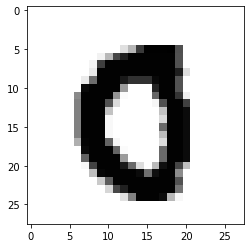

23775 Prediction:  [7]


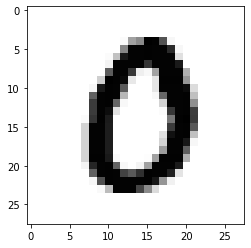

22719 Prediction:  [1]


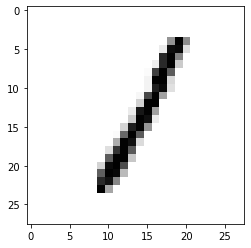

3918 Prediction:  [7]


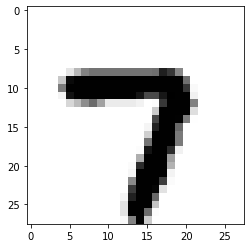

5626 Prediction:  [2]


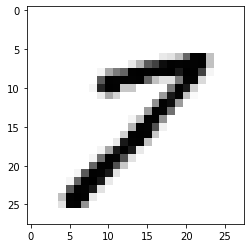

22915 Prediction:  [8]


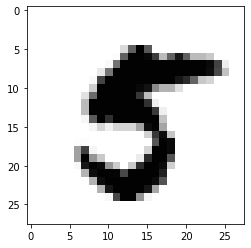

23210 Prediction:  [3]


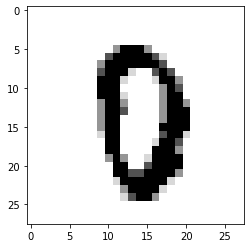

In [4]:
nb_classes = 10
 
# MNIST data image of shape 28 * 28 = 784
x = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
y = tf.placeholder(tf.int32, [None, 1])
 
y_one_hot = tf.one_hot(y, nb_classes)
y_one_hot = tf.reshape(y_one_hot, [-1, nb_classes])
 
w1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
layer1=tf.sigmoid(tf.matmul(x, w1)+b1)

w2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
layer2=tf.sigmoid(tf.matmul(layer1, w2)+b2)

w3 = tf.Variable(tf.random_normal([256, nb_classes]))
b3 = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
logits = tf.matmul(layer2,w3)+b3
hypothesis = tf.nn.softmax(logits)
 
cost_i=tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_one_hot)
cost=tf.reduce_mean(cost_i)
 
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
 
# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y_one_hot, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
 
with tf.Session() as sess:
  # parameters
  num_epochs = 15
  batch_size = 100
  num_iterations = int(len(x_data)/ batch_size)
  
  # Initialize TensorFlow variables
  sess.run(tf.global_variables_initializer())
  # Training cycle
  for epoch in range(num_epochs):
    avg_cost = 0
    for i in range(num_iterations):
      srt = i*batch_size
      x_batch = x_data[srt:srt+batch_size]
      y_batch = y_data[srt:srt+batch_size]
      _, cost_val = sess.run([train, cost], feed_dict={x: x_batch, y:y_batch.reshape(len(y_batch),1)})
      avg_cost += cost_val / (num_iterations+1)

    print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))
    
  print("Learning finished")
 
  # Test the model using test sets
  print(
      "Accuracy: ",
      accuracy.eval(
          session=sess, feed_dict={x: x_data, y: y_data.reshape(len(y_data),1)}
      ),
  )
 
  # Get one and predict
  for step in range(10):
    r = random.randint(0, len(test_x) - 1)
    print(
      r, "Prediction: ",
      sess.run(tf.argmax(hypothesis, 1), feed_dict={x: test_x[r : r + 1]}),
    )
 
    plt.imshow(
      test_x[r : r + 1].reshape(28, 28),
      cmap="Greys",
      interpolation="nearest",
    )
    plt.show()

Epoch: 0001, Cost: 246.206064933
Epoch: 0002, Cost: 123.562274461
Epoch: 0003, Cost: 102.103357674
Epoch: 0004, Cost: 89.660546446
Epoch: 0005, Cost: 82.482995358
Epoch: 0006, Cost: 76.031705216
Epoch: 0007, Cost: 70.837301089
Epoch: 0008, Cost: 68.875902210
Epoch: 0009, Cost: 66.879335009
Epoch: 0010, Cost: 65.373248931
Epoch: 0011, Cost: 61.823645126
Epoch: 0012, Cost: 62.352097373
Epoch: 0013, Cost: 60.877956368
Epoch: 0014, Cost: 59.597083523
Epoch: 0015, Cost: 59.103019622
Learning finished
Accuracy:  0.89861906
26279 Prediction:  [5]


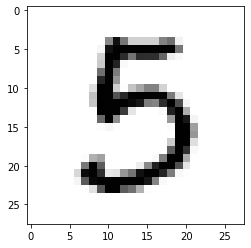

17744 Prediction:  [6]


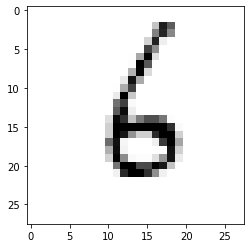

25177 Prediction:  [1]


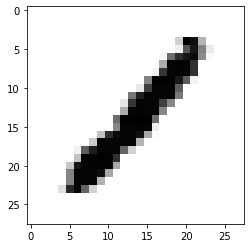

476 Prediction:  [1]


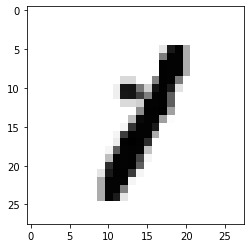

20581 Prediction:  [5]


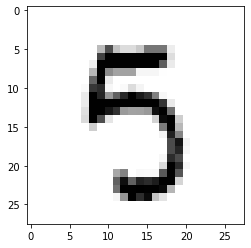

14976 Prediction:  [4]


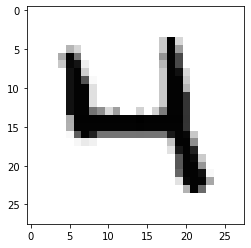

25199 Prediction:  [4]


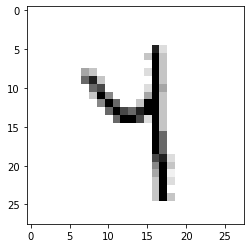

2622 Prediction:  [1]


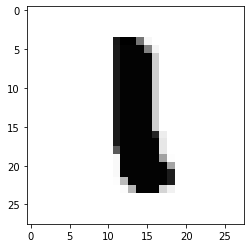

9034 Prediction:  [2]


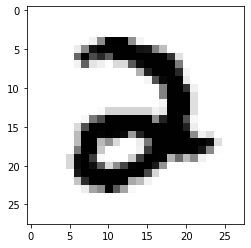

2021 Prediction:  [9]


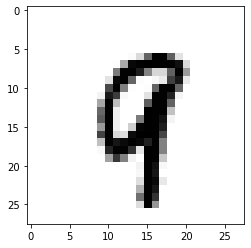

In [5]:
nb_classes = 10
 
# MNIST data image of shape 28 * 28 = 784
x = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
y = tf.placeholder(tf.int32, [None, 1])
 
y_one_hot = tf.one_hot(y, nb_classes)
y_one_hot = tf.reshape(y_one_hot, [-1, nb_classes])
 
w = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
logits = tf.matmul(x,w)+b
hypothesis = tf.nn.softmax(logits)
 
cost_i=tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_one_hot)
cost=tf.reduce_mean(cost_i)
 
train = tf.train.GradientDescentOptimizer(learning_rate=0.005).minimize(cost)
 
# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y_one_hot, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
 
with tf.Session() as sess:
  # parameters
  num_epochs = 15
  batch_size = 100
  num_iterations = int(len(x_data)/ batch_size)

  # Initialize TensorFlow variables
  sess.run(tf.global_variables_initializer())
  # Training cycle
  for epoch in range(num_epochs):
    avg_cost = 0
    
    for i in range(num_iterations):
      srt = i*batch_size
      x_batch = x_data[srt:srt+batch_size]
      y_batch = y_data[srt:srt+batch_size]
      _, cost_val = sess.run([train, cost], feed_dict={x: x_batch, y:y_batch.reshape(len(y_batch),1)})
      avg_cost += cost_val / num_iterations

    print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))
    
  print("Learning finished")
 
  # Test the model using test sets
  print(
      "Accuracy: ",
      accuracy.eval(
          session=sess, feed_dict={x: x_data, y: y_data.reshape(len(y_data),1)}
      ),
  )
 
  # Get one and predict
  for step in range(10):
    r = random.randint(0, len(test_x) - 1)
    print(
      r, "Prediction: ",
      sess.run(tf.argmax(hypothesis, 1), feed_dict={x: test_x[r : r + 1]}),
    )
 
    plt.imshow(
      test_x[r : r + 1].reshape(28, 28),
      cmap="Greys",
      interpolation="nearest",
    )
    plt.show()

Epoch: 0001, Cost: 24688.569007331
Epoch: 0002, Cost: 3179.796788220
Epoch: 0003, Cost: 1911.918295910
Epoch: 0004, Cost: 1321.946369334
Epoch: 0005, Cost: 975.548776853
Epoch: 0006, Cost: 758.140655951
Epoch: 0007, Cost: 604.987237722
Epoch: 0008, Cost: 485.833647886
Epoch: 0009, Cost: 400.493064257
Epoch: 0010, Cost: 332.139462611
Epoch: 0011, Cost: 281.848751412
Epoch: 0012, Cost: 236.456644584
Epoch: 0013, Cost: 197.629781383
Epoch: 0014, Cost: 169.544745432
Epoch: 0015, Cost: 147.191310251
Epoch: 0016, Cost: 128.690319041
Epoch: 0017, Cost: 105.266384717
Epoch: 0018, Cost: 90.222945316
Epoch: 0019, Cost: 77.979264247
Epoch: 0020, Cost: 67.541146743
Epoch: 0021, Cost: 58.591399350
Epoch: 0022, Cost: 49.097868714
Epoch: 0023, Cost: 42.100242232
Epoch: 0024, Cost: 35.480535345
Epoch: 0025, Cost: 29.648763703
Epoch: 0026, Cost: 27.027016167
Epoch: 0027, Cost: 22.354629859
Epoch: 0028, Cost: 18.617425577
Epoch: 0029, Cost: 15.686083595
Epoch: 0030, Cost: 13.217583627
Learning finished


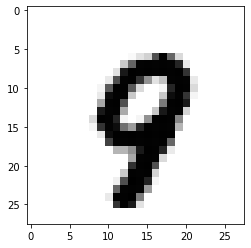

22408 Prediction:  [7]


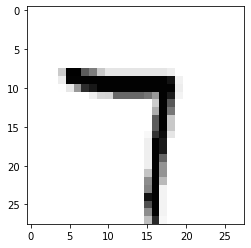

7214 Prediction:  [1]


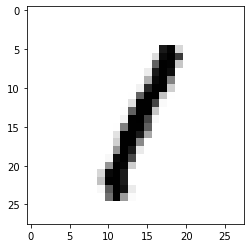

16230 Prediction:  [1]


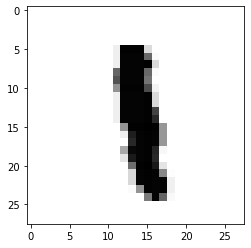

484 Prediction:  [9]


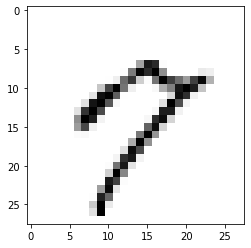

10106 Prediction:  [0]


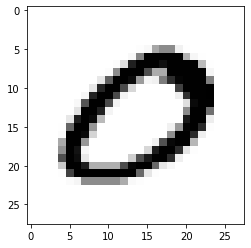

7709 Prediction:  [4]


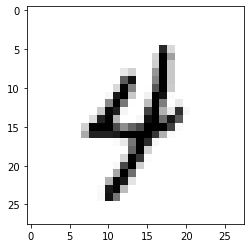

25429 Prediction:  [8]


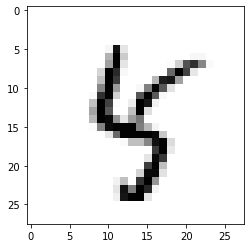

17727 Prediction:  [5]


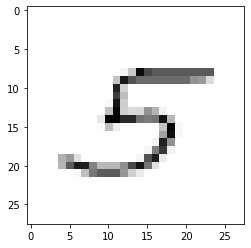

10368 Prediction:  [2]


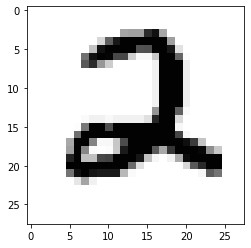

In [14]:
#activiation function을 sigmoid 대신 ReLU를 사용

nb_classes = 10
 
# MNIST data image of shape 28 * 28 = 784
x = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
y = tf.placeholder(tf.int32, [None, 1])
 
y_one_hot = tf.one_hot(y, nb_classes)
y_one_hot = tf.reshape(y_one_hot, [-1, nb_classes])
 
w1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
layer1=tf.nn.relu(tf.matmul(x, w1)+b1)

w2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
layer2=tf.nn.relu(tf.matmul(layer1, w2)+b2)

w3 = tf.Variable(tf.random_normal([256, nb_classes]))
b3 = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
logits = tf.matmul(layer2,w3)+b3
hypothesis = tf.nn.softmax(logits)
 
cost_i=tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_one_hot)
cost=tf.reduce_mean(cost_i)
 
train = tf.train.GradientDescentOptimizer(learning_rate=1e-4).minimize(cost)
 
# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y_one_hot, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
 
with tf.Session() as sess:
  # parameters
  num_epochs = 30
  batch_size = 200
  num_iterations = int(len(x_data)/ batch_size)
  
  # Initialize TensorFlow variables
  sess.run(tf.global_variables_initializer())
  # Training cycle
  for epoch in range(num_epochs):
    avg_cost = 0
    for i in range(num_iterations):
      srt = i*batch_size
      x_batch = x_data[srt:srt+batch_size]
      y_batch = y_data[srt:srt+batch_size]
      _, cost_val = sess.run([train, cost], feed_dict={x: x_batch, y:y_batch.reshape(len(y_batch),1)})
      avg_cost += cost_val / (num_iterations+1)

    print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))
    
  print("Learning finished")
 
  # Test the model using test sets
  print(
      "Accuracy: ",
      accuracy.eval(
          session=sess, feed_dict={x: x_data, y: y_data.reshape(len(y_data),1)}
      ),
  )
 
  # Get one and predict
  for step in range(10):
    r = random.randint(0, len(test_x) - 1)
    print(
      r, "Prediction: ",
      sess.run(tf.argmax(hypothesis, 1), feed_dict={x: test_x[r : r + 1]}),
    )
 
    plt.imshow(
      test_x[r : r + 1].reshape(28, 28),
      cmap="Greys",
      interpolation="nearest",
    )
    plt.show()

In [ ]:
#activiation function을 sigmoid 대신 ReLU를 사용

nb_classes = 10
 
# MNIST data image of shape 28 * 28 = 784
x = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
y = tf.placeholder(tf.int32, [None, 1])
 
y_one_hot = tf.one_hot(y, nb_classes)
y_one_hot = tf.reshape(y_one_hot, [-1, nb_classes])
 
w1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
layer1=tf.nn.relu(tf.matmul(x, w1)+b1)

w2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
layer2=tf.nn.relu(tf.matmul(layer1, w2)+b2)

w3 = tf.Variable(tf.random_normal([256, nb_classes]))
b3 = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
logits = tf.matmul(layer2,w3)+b3
hypothesis = tf.nn.softmax(logits)
 
cost_i=tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_one_hot)
cost=tf.reduce_mean(cost_i)
 
train = tf.train.GradientDescentOptimizer(learning_rate=1e-4).minimize(cost)
 
# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y_one_hot, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
 
with tf.Session() as sess:
  # parameters
  num_epochs = 30
  batch_size = 200
  num_iterations = int(len(x_data)/ batch_size)
  
  # Initialize TensorFlow variables
  sess.run(tf.global_variables_initializer())
  # Training cycle
  for epoch in range(num_epochs):
    avg_cost = 0
    for i in range(num_iterations):
      srt = i*batch_size
      x_batch = x_data[srt:srt+batch_size]
      y_batch = y_data[srt:srt+batch_size]
      _, cost_val = sess.run([train, cost], feed_dict={x: x_batch, y:y_batch.reshape(len(y_batch),1)})
      avg_cost += cost_val / (num_iterations+1)

    print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))
    
  print("Learning finished")
 
  # Test the model using test sets
  print(
      "Accuracy: ",
      accuracy.eval(
          session=sess, feed_dict={x: x_data, y: y_data.reshape(len(y_data),1)}
      ),
  )
 
  # Get one and predict
  for step in range(10):
    r = random.randint(0, len(test_x) - 1)
    print(
      r, "Prediction: ",
      sess.run(tf.argmax(hypothesis, 1), feed_dict={x: test_x[r : r + 1]}),
    )
 
    plt.imshow(
      test_x[r : r + 1].reshape(28, 28),
      cmap="Greys",
      interpolation="nearest",
    )
    plt.show()

Epoch: 0001, Cost: 20858.621458225
Epoch: 0002, Cost: 2741.714196083
Epoch: 0003, Cost: 1640.302521620
Epoch: 0004, Cost: 1135.093107901
Epoch: 0005, Cost: 849.447043396
Epoch: 0006, Cost: 657.554443576
Epoch: 0007, Cost: 528.110421099
